Imports

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [118]:
sat_df = pd.read_csv('../data/database.csv')

In [119]:
sat_df.T

,0,1,2,3,4,5,6,7,8,9,...,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419
Official Name of Satellite,AAUSat-4,ABS-2,ABS-2A,ABS-3,ABS-3A,ABS-4,ABS-6,ABS-7,USA 139,USA 171,...,Zhongxing 12,Zhongxing 1A,Zhongxing 20A,Zhongxing 22A,Zhongxing 2A,Zhongxing 9,Zijing 1,Ziyuan 1-02C,Ziyuan 3,Ziyan 3-2
Country/Organization of UN Registry,NR,NR,NR,Philippines,NR,NR,NR,South Korea,USA,USA,...,China/Sri Lanka,China,China,China,China,China,NR,China,China,NR
Operator/Owner,University of Aalborg,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,National Reconnaissance Office (NRO),National Reconnaissance Office (NRO),...,China Satellite Communication Corp. (China Sat...,People's Liberation Army (C41),People's Liberation Army (C41),China Satellite Communication Corp. (China Sat...,People's Liberation Army (C41),China Satellite Communication Corp. (China Sat...,Tsinghua University,China Centre for Resources Satellite Data and ...,China Centre for Resources Satellite Data and ...,China Centre for Resources Satellite Data and ...
Country of Operator/Owner,Denmark,Multinational,Multinational,Multinational,Multinational,Multinational,Multinational,Multinational,USA,USA,...,China,China,China,China,China,China,China,China,China,China
Users,Civil,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Military,Military,...,Government,Military,Military,Military,Military/Government,Government,Civil,Government,Government,Government
Purpose,Earth Observation,Communications,Communications,Communications,Communications,Communications,Communications,Communications,Earth Observation,Earth Observation,...,Communications,Communications,Communications,Communications,Communications,Communications,Technology Development,Earth Observation,Earth Observation,Earth Observation
Detailed Purpose,Automatic Identification System (AIS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electronic Intelligence,Electronic Intelligence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Optical Imaging,Optical Imaging,Optical Imaging
Class of Orbit,LEO,GEO,GEO,GEO,GEO,GEO,GEO,GEO,GEO,GEO,...,GEO,GEO,GEO,GEO,GEO,GEO,LEO,LEO,LEO,LEO
Type of Orbit,Sun-Synchronous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sun-Synchronous,Sun-Synchronous,Sun-Synchronous,Sun-Synchronous
Longitude of Geosynchronous Orbit (Degrees),0.0,75.0,-75.0,146.06,-3.0,75.0,159.0,116.18,-14.5,95.4,...,87.5,129.84,130.0,103.28,98.0,92.22,0.0,0.0,0.0,0.0


In [120]:
sat_df.describe()

,Longitude of Geosynchronous Orbit (Degrees),Perigee (Kilometers),Apogee (Kilometers),Eccentricity,Inclination (Degrees),NORAD Number
count,1402.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000
mean,5.786598,14604.973221,16532.527837,0.020815,50.278703,34574.525722
std,53.973571,16550.261760,22155.693096,0.112768,41.841954,6087.083306
min,-177.120000,200.000000,322.000000,0.000000,0.000000,7530.000000
25%,0.000000,621.000000,687.000000,0.000210,0.090000,28377.000000
50%,0.000000,1357.000000,1415.000000,0.000534,54.970000,37234.000000
75%,0.000000,35770.000000,35795.000000,0.001580,97.460000,40022.000000
max,328.500000,62200.000000,330000.000000,0.957000,143.400000,41634.000000


In [121]:
duplicate_rows = sat_df[sat_df.duplicated()]

In [122]:
duplicate_rows

,Official Name of Satellite,Country/Organization of UN Registry,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of Geosynchronous Orbit (Degrees),...,Dry Mass (Kilograms),Power (Watts),Date of Launch,Expected Lifetime (Years),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number


In [123]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Official Name of Satellite                   1420 non-null   object 
 1   Country/Organization of UN Registry          1420 non-null   object 
 2   Operator/Owner                               1419 non-null   object 
 3   Country of Operator/Owner                    1420 non-null   object 
 4   Users                                        1419 non-null   object 
 5   Purpose                                      1419 non-null   object 
 6   Detailed Purpose                             369 non-null    object 
 7   Class of Orbit                               1419 non-null   object 
 8   Type of Orbit                                899 non-null    object 
 9   Longitude of Geosynchronous Orbit (Degrees)  1402 non-null   float64
 10  

In [124]:
sat_df.isnull().sum()

Official Name of Satellite                        0
Country/Organization of UN Registry               0
Operator/Owner                                    1
Country of Operator/Owner                         0
Users                                             1
Purpose                                           1
Detailed Purpose                               1051
Class of Orbit                                    1
Type of Orbit                                   521
Longitude of Geosynchronous Orbit (Degrees)      18
Perigee (Kilometers)                              1
Apogee (Kilometers)                               1
Eccentricity                                      1
Inclination (Degrees)                             1
Period (Minutes)                                  3
Launch Mass (Kilograms)                         103
Dry Mass (Kilograms)                            947
Power (Watts)                                   771
Date of Launch                                    4
Expected Lif

In [125]:
sat_df.isnull().value_counts()

Official Name of Satellite  Country/Organization of UN Registry  Operator/Owner  Country of Operator/Owner  Users  Purpose  Detailed Purpose  Class of Orbit  Type of Orbit  Longitude of Geosynchronous Orbit (Degrees)  Perigee (Kilometers)  Apogee (Kilometers)  Eccentricity  Inclination (Degrees)  Period (Minutes)  Launch Mass (Kilograms)  Dry Mass (Kilograms)  Power (Watts)  Date of Launch  Expected Lifetime (Years)  Contractor  Country of Contractor  Launch Site  Launch Vehicle  COSPAR Number  NORAD Number
False                       False                                False           False                      False  False    True              False           True           False                                        False                 False                False         False                  False             False                    False                 False          False           False                      False       False                  False        False           Fa

In [126]:
sat_df.dropna(subset=["Expected Lifetime (Years)"], inplace=True)

In [127]:
sat_df.isnull().sum()

Official Name of Satellite                       0
Country/Organization of UN Registry              0
Operator/Owner                                   0
Country of Operator/Owner                        0
Users                                            0
Purpose                                          0
Detailed Purpose                               794
Class of Orbit                                   0
Type of Orbit                                  448
Longitude of Geosynchronous Orbit (Degrees)     10
Perigee (Kilometers)                             0
Apogee (Kilometers)                              0
Eccentricity                                     0
Inclination (Degrees)                            0
Period (Minutes)                                 0
Launch Mass (Kilograms)                         22
Dry Mass (Kilograms)                           546
Power (Watts)                                  367
Date of Launch                                   0
Expected Lifetime (Years)      

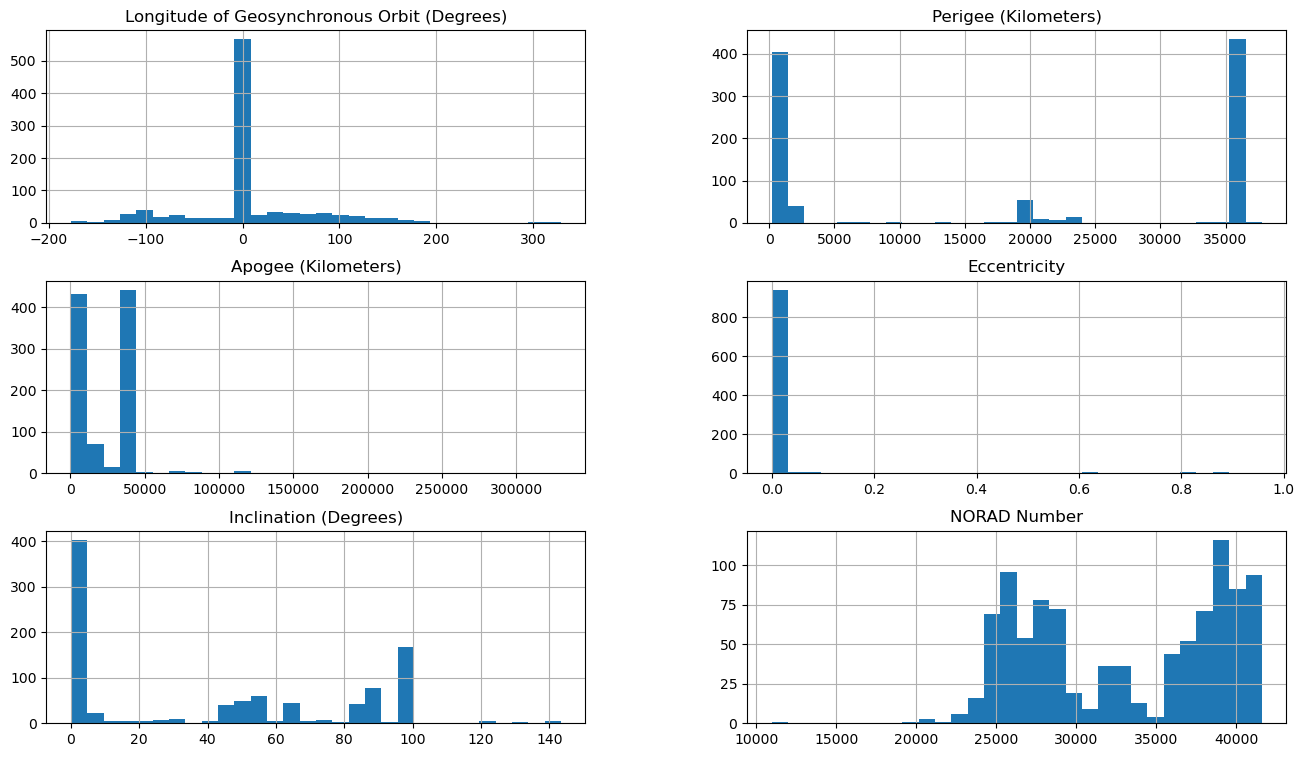

In [128]:
sat_df.hist(bins=30,figsize=(16,9))
plt.show()

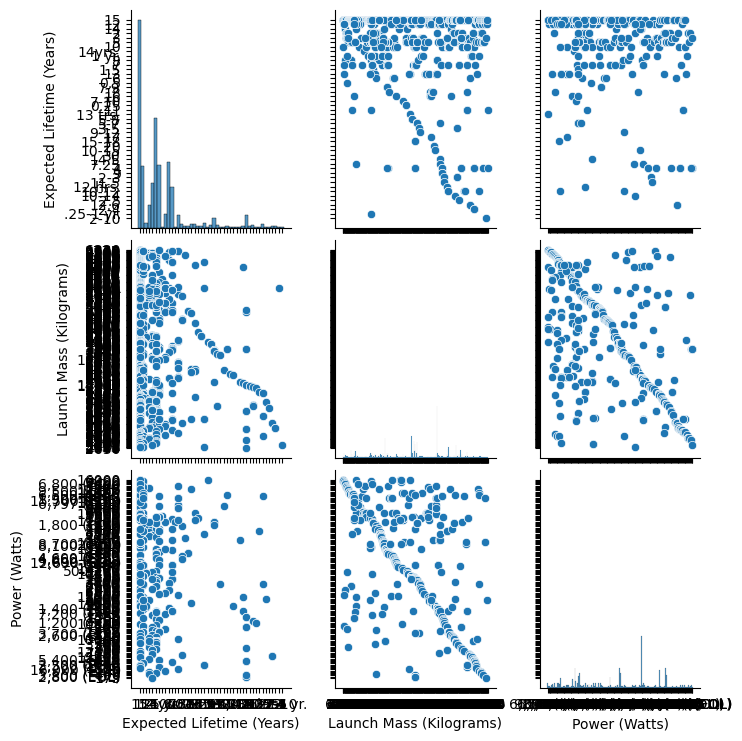

In [129]:
sns.pairplot(sat_df, vars=["Expected Lifetime (Years)", "Launch Mass (Kilograms)", "Power (Watts)"])
plt.show()

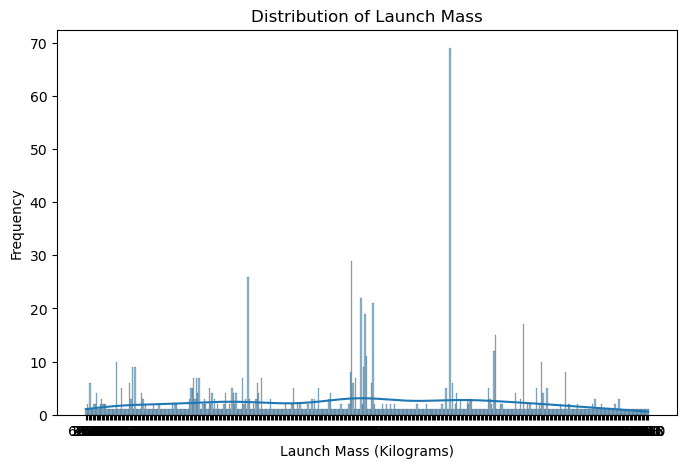

In [130]:
plt.figure(figsize=(8, 5))
sns.histplot(sat_df["Launch Mass (Kilograms)"], bins=20, kde=True)
plt.xlabel("Launch Mass (Kilograms)")
plt.ylabel("Frequency")
plt.title("Distribution of Launch Mass")
plt.show()

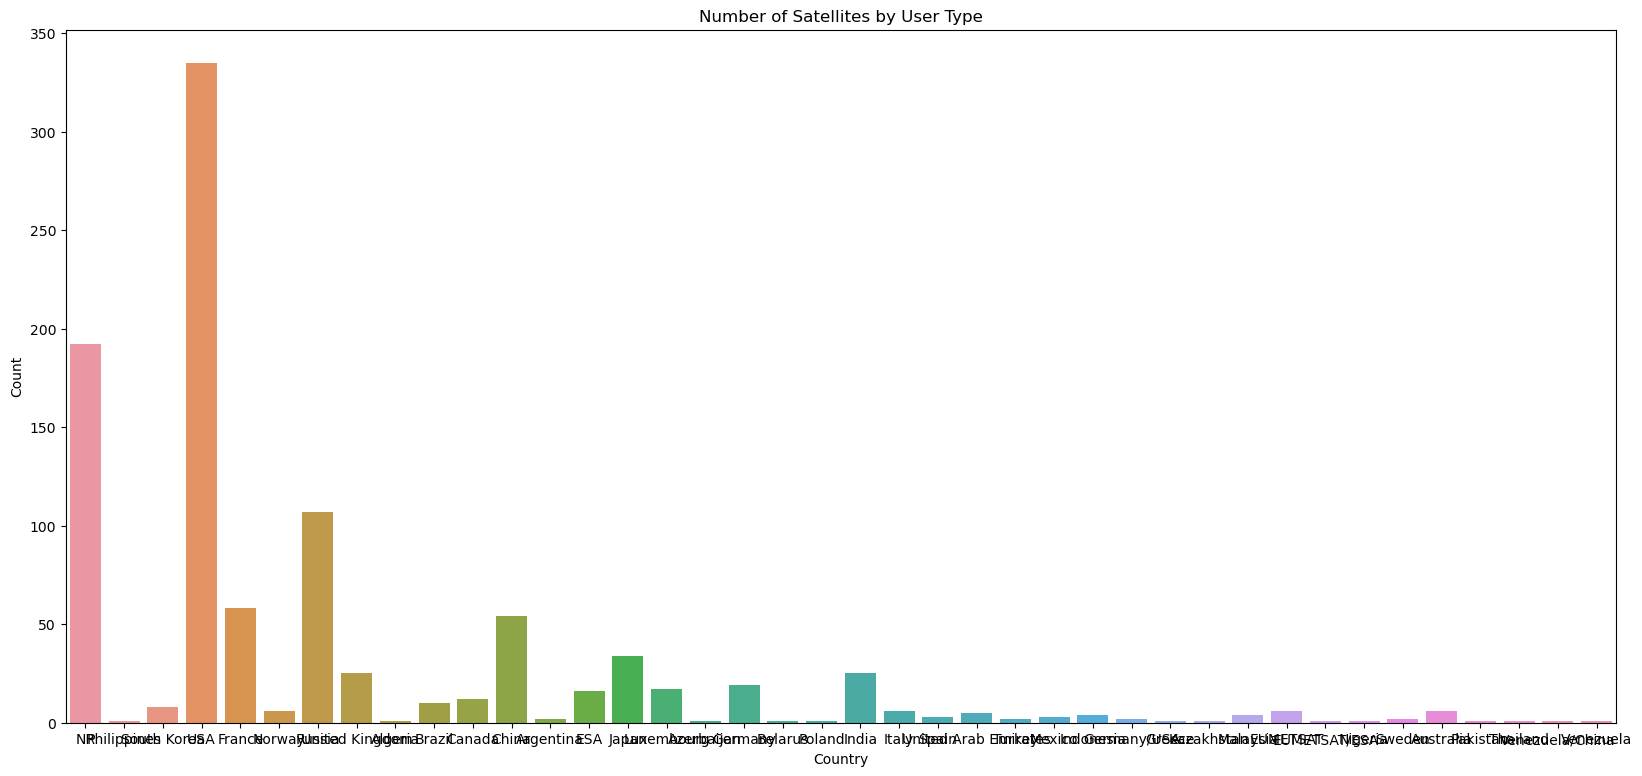

In [131]:
#Would change this to show top 10 only if I choose this dataset
plt.figure(figsize=(20, 9))
sns.countplot(x="Country/Organization of UN Registry", data=sat_df)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Number of Satellites by User Type")
plt.show()

C:\Users\joshy\AppData\Local\Temp\ipykernel_25976\2818007933.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sat_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


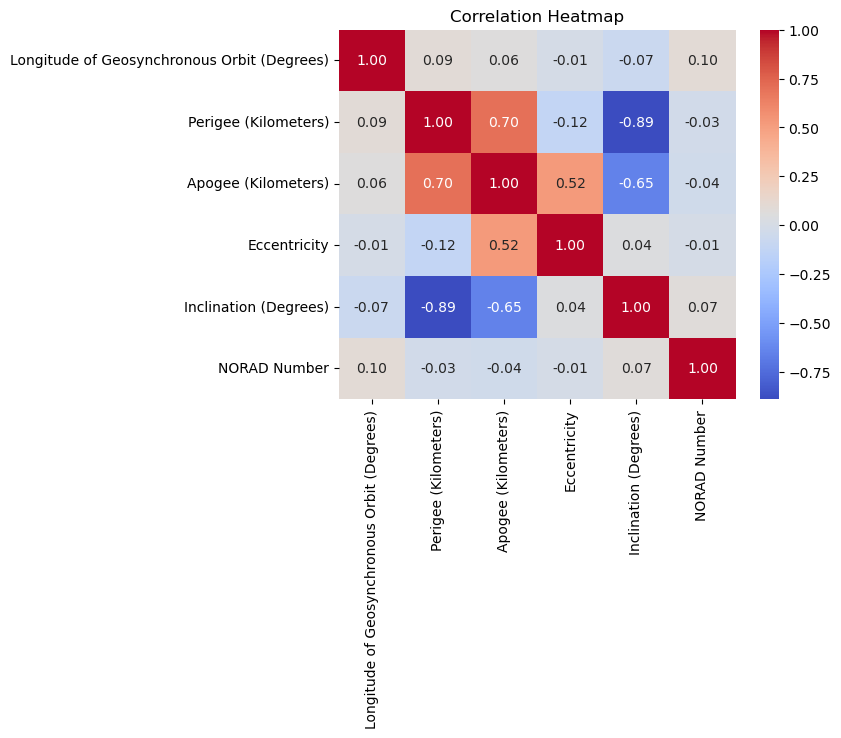

In [132]:
sns.heatmap(sat_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Dummy variable

In [133]:
data = pd.get_dummies(sat_df, columns=["Country/Organization of UN Registry"], drop_first=True)

In [134]:
data

,Official Name of Satellite,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of Geosynchronous Orbit (Degrees),Perigee (Kilometers),...,Country/Organization of UN Registry_South Korea,Country/Organization of UN Registry_Spain,Country/Organization of UN Registry_Sweden,Country/Organization of UN Registry_Thailand,Country/Organization of UN Registry_Turkey,Country/Organization of UN Registry_USA,Country/Organization of UN Registry_United Arab Emirates,Country/Organization of UN Registry_United Kingdom,Country/Organization of UN Registry_Venezuela,Country/Organization of UN Registry_Venezuela/China
1,ABS-2,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,35778.0,...,0,0,0,0,0,0,0,0,0,0
2,ABS-2A,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.00,35700.0,...,0,0,0,0,0,0,0,0,0,0
3,ABS-3,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,146.06,35769.0,...,0,0,0,0,0,0,0,0,0,0
4,ABS-3A,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-3.00,35788.0,...,0,0,0,0,0,0,0,0,0,0
5,ABS-4,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,35780.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Youthsat,Indian Space Research Organization (ISRO),India,Government,Space Science,NaN,LEO,Sun-Synchronous,0.00,802.0,...,0,0,0,0,0,0,0,0,0,0
1404,Ziyuan 2C,Chinese Academy of Space Technology,China,Military,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.00,555.0,...,0,0,0,0,0,0,0,0,0,0
1409,Zhongxing 10,China Satellite Communication Corp. (China Sat...,China,Government,Communications,NaN,GEO,NaN,110.50,35775.0,...,0,0,0,0,0,0,0,0,0,0
1418,Ziyuan 3,China Centre for Resources Satellite Data and ...,China,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.00,500.0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# sns.pairplot(data, vars=["Expected Lifetime (Years)", "Launch Mass (Kilograms)", "Power (Watts)"])
# plt.show()
## COMMENTING OUT TO SAVE TIME ON CELLS RUNNING

In [136]:
target = data["Expected Lifetime (Years)"]
features = data.drop("Expected Lifetime (Years)", axis=1)

In [137]:
features = sm.add_constant(features)

In [138]:
print(features)

      const Official Name of Satellite  \
1       1.0                      ABS-2   
2       1.0                     ABS-2A   
3       1.0                      ABS-3   
4       1.0                     ABS-3A   
5       1.0                      ABS-4   
...     ...                        ...   
1401    1.0                   Youthsat   
1404    1.0                  Ziyuan 2C   
1409    1.0               Zhongxing 10   
1418    1.0                   Ziyuan 3   
1419    1.0                  Ziyan 3-2   

                                         Operator/Owner  \
1                         Asia Broadcast Satellite Ltd.   
2                         Asia Broadcast Satellite Ltd.   
3                         Asia Broadcast Satellite Ltd.   
4                         Asia Broadcast Satellite Ltd.   
5                         Asia Broadcast Satellite Ltd.   
...                                                 ...   
1401          Indian Space Research Organization (ISRO)   
1404                Chi

Cleaning expected lifetime

First getting rid of null values, then will need to get average of ranges, then will need to drop string values

In [139]:
subset_df = sat_df.dropna(subset=["Expected Lifetime (Years)"])
subset_df = sat_df.dropna(subset=["Launch Mass (Kilograms)"])



In [140]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 1 to 1419
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Official Name of Satellite                   954 non-null    object 
 1   Country/Organization of UN Registry          954 non-null    object 
 2   Operator/Owner                               954 non-null    object 
 3   Country of Operator/Owner                    954 non-null    object 
 4   Users                                        954 non-null    object 
 5   Purpose                                      954 non-null    object 
 6   Detailed Purpose                             178 non-null    object 
 7   Class of Orbit                               954 non-null    object 
 8   Type of Orbit                                515 non-null    object 
 9   Longitude of Geosynchronous Orbit (Degrees)  944 non-null    float64
 10  P

In [141]:
unique_values = subset_df["Expected Lifetime (Years)"].unique()
unique_values

array(['15', '12', '14', '2', '3', '5', '10', '14yrs.', '1 yr.', '8', '7',
       '1.5', '13', '6', '7-9', '18', '16', '7-10', '0.25', '11',
       '13 trs,', '5-8', '5-7', '3-5', '9-12', '17', '15-18', '20',
       '10-15', '14.5', '7.25', '4', '9', '2-3', '11.5', '12 hrs.',
       '10-12', '0.5', '10-14', '2.5', '12.6', '2-4', '.25-1 yr.', '2-10'],
      dtype=object)

Function to convert range to mean

In [142]:
def convert_range_to_mean(value):
  if '-' in value:
    low, high = value.split('-')
    return (float(low) + float(high)) / 2
  return float(value)

Function to get rid of strings

In [143]:
def remove_extra_letters(value):
  return value.replace(' yr.', '').replace(' hrs.', '').replace(' trs', '').replace('yrs.', '').replace(',', '')

In [144]:
subset_df['Expected Lifetime (Years)'] = subset_df['Expected Lifetime (Years)'].apply(remove_extra_letters)

C:\Users\joshy\AppData\Local\Temp\ipykernel_25976\3421564536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Expected Lifetime (Years)'] = subset_df['Expected Lifetime (Years)'].apply(remove_extra_letters)


In [145]:
subset_df["Expected Lifetime (Years)"].unique()

array(['15', '12', '14', '2', '3', '5', '10', '1', '8', '7', '1.5', '13',
       '6', '7-9', '18', '16', '7-10', '0.25', '11', '5-8', '5-7', '3-5',
       '9-12', '17', '15-18', '20', '10-15', '14.5', '7.25', '4', '9',
       '2-3', '11.5', '10-12', '0.5', '10-14', '2.5', '12.6', '2-4',
       '.25-1', '2-10'], dtype=object)

In [146]:
subset_df['Expected Lifetime (Years)'] = subset_df['Expected Lifetime (Years)'].apply(convert_range_to_mean)

C:\Users\joshy\AppData\Local\Temp\ipykernel_25976\1674518603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Expected Lifetime (Years)'] = subset_df['Expected Lifetime (Years)'].apply(convert_range_to_mean)


In [147]:
subset_df["Expected Lifetime (Years)"].unique()

array([15.   , 12.   , 14.   ,  2.   ,  3.   ,  5.   , 10.   ,  1.   ,
        8.   ,  7.   ,  1.5  , 13.   ,  6.   , 18.   , 16.   ,  8.5  ,
        0.25 , 11.   ,  6.5  ,  4.   , 10.5  , 17.   , 16.5  , 20.   ,
       12.5  , 14.5  ,  7.25 ,  9.   ,  2.5  , 11.5  ,  0.5  , 12.6  ,
        0.625])

In [148]:
subset_df['Expected Lifetime (Years)'] = pd.to_numeric(subset_df['Expected Lifetime (Years)'], errors='coerce')

C:\Users\joshy\AppData\Local\Temp\ipykernel_25976\4199112910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Expected Lifetime (Years)'] = pd.to_numeric(subset_df['Expected Lifetime (Years)'], errors='coerce')


In [149]:
subset_df

,Official Name of Satellite,Country/Organization of UN Registry,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of Geosynchronous Orbit (Degrees),...,Dry Mass (Kilograms),Power (Watts),Date of Launch,Expected Lifetime (Years),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
1,ABS-2,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,NaN,16000,2/6/2014,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0
2,ABS-2A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.00,...,NaN,NaN,6/15/2016,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0
3,ABS-3,Philippines,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,146.06,...,1800,9000,8/19/1997,15.0,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901.0
4,ABS-3A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,NaN,3/2/2015,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424.0
5,ABS-4,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,1700,7400,3/13/2004,12.0,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,Yamal-402,Russia,Gazprom Space Systems,Russia,Commercial,Communications,NaN,GEO,NaN,55.00,...,NaN,NaN,12/8/2012,11.0,Thales,France,Baikonur Cosmodrome,Proton M,2012-070A,39022.0
1401,Youthsat,India,Indian Space Research Organization (ISRO),India,Government,Space Science,NaN,LEO,Sun-Synchronous,0.00,...,NaN,NaN,4/20/2011,2.0,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Center,PSLV C16,2011-015B,37388.0
1409,Zhongxing 10,China,China Satellite Communication Corp. (China Sat...,China,Government,Communications,NaN,GEO,NaN,110.50,...,NaN,NaN,6/20/2011,15.0,Chinese Academy of Space Technology (CAST),China,Xichang Satellite Launch Center,Long March 3B,2011-026A,37677.0
1418,Ziyuan 3,China,China Centre for Resources Satellite Data and ...,China,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.00,...,NaN,NaN,1/9/2012,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2012-001A,38046.0


In [150]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 1 to 1419
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Official Name of Satellite                   954 non-null    object 
 1   Country/Organization of UN Registry          954 non-null    object 
 2   Operator/Owner                               954 non-null    object 
 3   Country of Operator/Owner                    954 non-null    object 
 4   Users                                        954 non-null    object 
 5   Purpose                                      954 non-null    object 
 6   Detailed Purpose                             178 non-null    object 
 7   Class of Orbit                               954 non-null    object 
 8   Type of Orbit                                515 non-null    object 
 9   Longitude of Geosynchronous Orbit (Degrees)  944 non-null    float64
 10  P

Cleaning Launch Mass

In [151]:
subset_df["Launch Mass (Kilograms)"].unique()

array(['6330', '1800', '3775', '2000', '4143', '2894', '3500', '6169',
       '5', '3460', '2704', '215', '6', '53', '6650', '130', '4545',
       '5465', '6265', '2938', '2783', '2315', '2340', '4200', '4312',
       '2081', '2648', '2500', '2845', '3909', '3901', '1935', '2015',
       '4100', '1400', '1600', '4710', '4500', '5910', '4715', '4905',
       '5054', '5200', '3000', '4630', '3600', '2977', '3105', '3480',
       '4137', '3760', '3700', '3813', '2775', '500', '2924', '3010',
       '3379', '3690', '4332', '5345', '5350', '3635', '3315', '3643',
       '1420', '6052', '6000', '1500', '5471', '5724', '230', '3080',
       '25', '3250', '3304', '5420', '4940', '3400', '5500', '4000', '1',
       '2200', '3800', '800', '2300', '166', '5223', '92', '400', '1780',
       '2495', '3540', '10', '1980', '2060', '2910', '587', '1560', '680',
       '694', '727', '490', '4742', '5100', '4600', '5585', '848', '2440',
       '817', '70', '1700', '720', '3', '2120', '1850', '90', '310'

In [152]:
subset_df["Launch Mass (Kilograms)"] = pd.to_numeric(subset_df["Launch Mass (Kilograms)"], errors='coerce')

C:\Users\joshy\AppData\Local\Temp\ipykernel_25976\2159242130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["Launch Mass (Kilograms)"] = pd.to_numeric(subset_df["Launch Mass (Kilograms)"], errors='coerce')


In [153]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 1 to 1419
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Official Name of Satellite                   954 non-null    object 
 1   Country/Organization of UN Registry          954 non-null    object 
 2   Operator/Owner                               954 non-null    object 
 3   Country of Operator/Owner                    954 non-null    object 
 4   Users                                        954 non-null    object 
 5   Purpose                                      954 non-null    object 
 6   Detailed Purpose                             178 non-null    object 
 7   Class of Orbit                               954 non-null    object 
 8   Type of Orbit                                515 non-null    object 
 9   Longitude of Geosynchronous Orbit (Degrees)  944 non-null    float64
 10  P

Cleaning Power

In [154]:
subset_df["Power (Watts)"].unique()

array(['16000', nan, '9000', '7400', '6,800 (EOL)', '4800', '7000',
       '5500', '216', '12000', '9,500 (EOL)', '15300', '14000',
       '6,500 (EOL)', '5000', '3300', '10000', '1,900 (EOL)',
       '15,500 (EOL)', '17500', '10500', '6,797 (EOL)', '8600', '4600',
       '9500', '8500', '5600', '4400', '6600', '13000', '9900', '7800',
       '1500', '6000', '50', '11000', '120', '300', '1,800 (BOL)', '550',
       '1100', '600', '2300', '2500', '8000', '570', '3500', '1174', '46',
       '3600', '5200', '450', '18000', '8,700 (BOL)', '20000',
       '8,100 (EOL)', '8200', '13900', '900', '2100', '1240', '1485',
       '360', '16100', '2530', '4,600 (EOL)', '4,860 (EOL)', '800',
       '9,000 (EOL)', '12,690 (EOL)', '5100', '1600', '5900', '13200',
       '14500', '4200', '500-700', '55', '10400', '4700', '1420', '4.05',
       '1700', '1000', '150', '3800', '1430', '3100', '6250', '2900',
       '7600', '414', '2600', '6200', '5', '2400', '2800', '15000',
       '3200', '3000', '2000'

C:\Users\joshy\AppData\Local\Temp\ipykernel_25976\3078520360.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


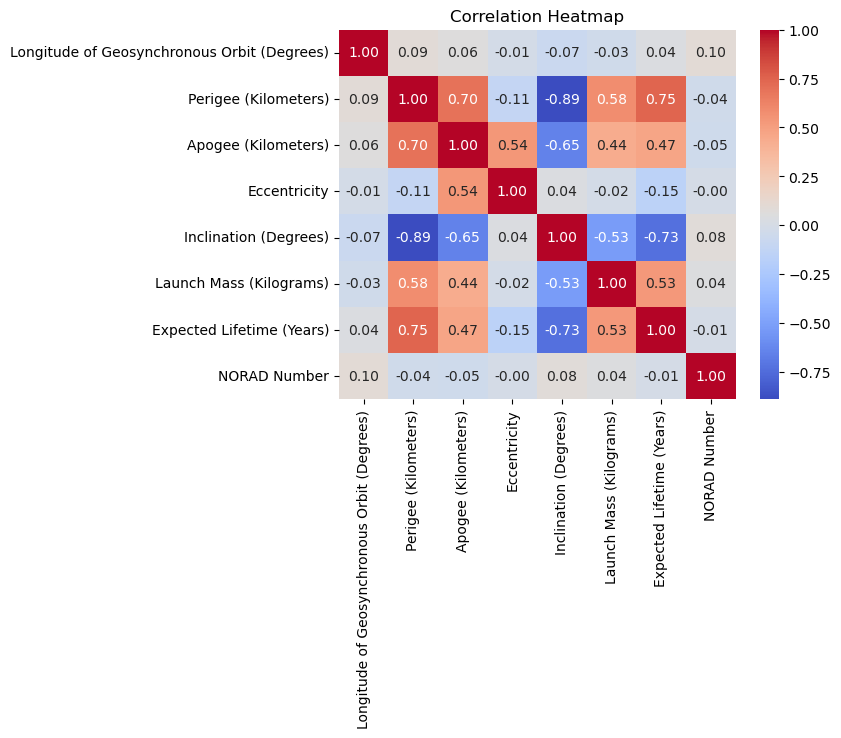

In [155]:
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [166]:
subset_df["Class of Orbit"].unique()

array(['GEO', 'LEO', 'MEO', 'Elliptical', 'LEO '], dtype=object)

Function to remove LEO

In [169]:
def remove_extra_letters(value):
  return value.replace('LEO ', 'LEO')

In [170]:
subset_df['Class of Orbit'] = subset_df['Class of Orbit'].apply(remove_extra_letters)

C:\Users\joshy\AppData\Local\Temp\ipykernel_25976\2652890680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Class of Orbit'] = subset_df['Class of Orbit'].apply(remove_extra_letters)


In [171]:
subset_df["Class of Orbit"].unique()

array(['GEO', 'LEO', 'MEO', 'Elliptical'], dtype=object)

In [173]:
orbit = pd.get_dummies(subset_df, columns=["Class of Orbit"], drop_first=True)

In [174]:
orbit.T

,1,2,3,4,5,6,7,14,15,19,...,1350,1351,1359,1361,1363,1364,1401,1409,1418,1419
Official Name of Satellite,ABS-2,ABS-2A,ABS-3,ABS-3A,ABS-4,ABS-6,ABS-7,USA 235,USA 246,Aerocube 5A,...,X-Sat,XTAR-EUR,Yahsat-1A,Yamal-202,Yamal-401,Yamal-402,Youthsat,Zhongxing 10,Ziyuan 3,Ziyan 3-2
Country/Organization of UN Registry,NR,NR,Philippines,NR,NR,NR,South Korea,USA,NR,NR,...,NR,USA,United Arab Emirates,Russia,Russia,Russia,India,China,China,NR
Operator/Owner,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,US Air Force,US Air Force,Aerospace Corporation,...,Centre for Research in Satellite Technology (C...,Ministry of Defense/XTAR,Al Yah Satellite Communications Company (YAHSAT),Gazprom Space Systems,Gazprom Space Systems,Gazprom Space Systems,Indian Space Research Organization (ISRO),China Satellite Communication Corp. (China Sat...,China Centre for Resources Satellite Data and ...,China Centre for Resources Satellite Data and ...
Country of Operator/Owner,Multinational,Multinational,Multinational,Multinational,Multinational,Multinational,Multinational,USA,USA,USA,...,Singapore,Spain,United Arab Emirates,Russia,Russia,Russia,India,China,China,China
Users,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Military,Military,Commercial,...,Government,Military/Government,Military/Commercial,Commercial,Commercial,Commercial,Government,Government,Government,Government
Purpose,Communications,Communications,Communications,Communications,Communications,Communications,Communications,Communications,Communications,Technology Development,...,Earth Observation,Communications,Communications,Communications,Communications,Communications,Space Science,Communications,Earth Observation,Earth Observation
Detailed Purpose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Optical Imaging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Optical Imaging,Optical Imaging
Type of Orbit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Polar,...,Sun-Synchronous,NaN,NaN,NaN,NaN,NaN,Sun-Synchronous,NaN,Sun-Synchronous,Sun-Synchronous
Longitude of Geosynchronous Orbit (Degrees),75.0,-75.0,146.06,-3.0,75.0,159.0,116.18,-120.0,NaN,0.0,...,0.0,29.03,52.5,49.03,90.0,55.0,0.0,110.5,0.0,0.0
Perigee (Kilometers),35778.0,35700.0,35769.0,35788.0,35780.0,35777.0,35780.0,35772.0,35700.0,443.0,...,801.0,35778.0,35743.0,35774.0,35761.0,35784.0,802.0,35775.0,500.0,487.0


C:\Users\joshy\AppData\Local\Temp\ipykernel_25976\2605743734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(orbit.corr(), annot=True, cmap='coolwarm', fmt='.2f')


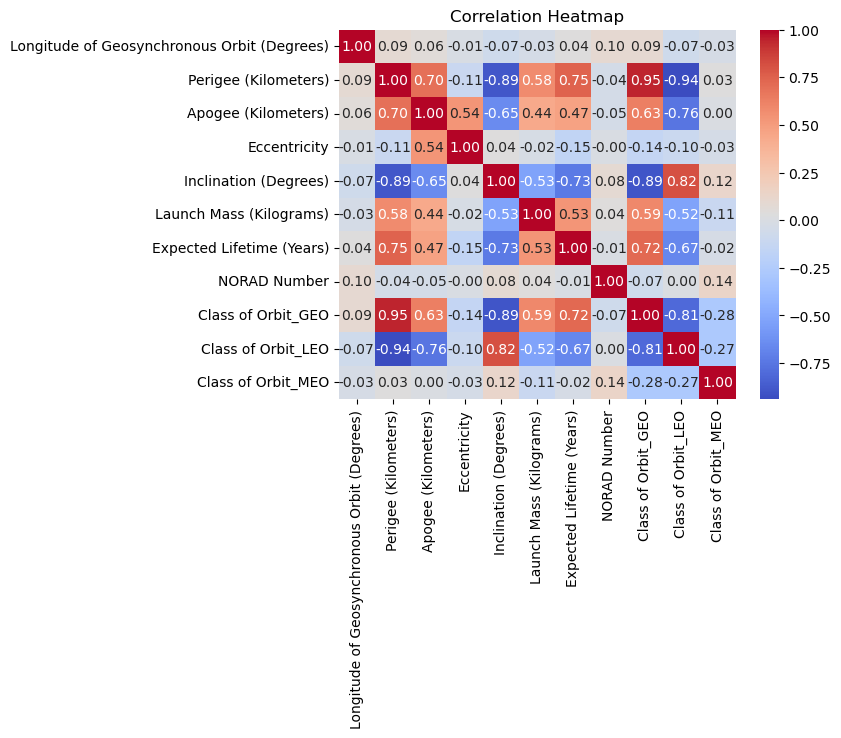

In [175]:
sns.heatmap(orbit.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

My Hypothesis

Null: 

In [176]:
nan_values_in_columns = orbit[['Class of Orbit_LEO', 'Class of Orbit_MEO', 'Class of Orbit_GEO',
                              'Launch Mass (Kilograms)', 'Expected Lifetime (Years)']].isna()

# Count the number of NaN values in each column
nan_count_in_columns = orbit[['Class of Orbit_LEO', 'Class of Orbit_MEO', 'Class of Orbit_GEO',
                              'Launch Mass (Kilograms)', 'Expected Lifetime (Years)']].isna().sum()

# Print the results
print("NaN values in the selected columns:")
print(nan_values_in_columns)

print("\nNaN count in each column:")
print(nan_count_in_columns)

NaN values in the selected columns:
      Class of Orbit_LEO  Class of Orbit_MEO  Class of Orbit_GEO  \
1                  False               False               False   
2                  False               False               False   
3                  False               False               False   
4                  False               False               False   
5                  False               False               False   
...                  ...                 ...                 ...   
1364               False               False               False   
1401               False               False               False   
1409               False               False               False   
1418               False               False               False   
1419               False               False               False   

      Launch Mass (Kilograms)  Expected Lifetime (Years)  
1                       False                      False  
2                       False

Predictive Linear Regression

In [188]:
orbit.T

,1,2,3,4,5,6,7,14,15,19,...,1350,1351,1359,1361,1363,1364,1401,1409,1418,1419
Official Name of Satellite,ABS-2,ABS-2A,ABS-3,ABS-3A,ABS-4,ABS-6,ABS-7,USA 235,USA 246,Aerocube 5A,...,X-Sat,XTAR-EUR,Yahsat-1A,Yamal-202,Yamal-401,Yamal-402,Youthsat,Zhongxing 10,Ziyuan 3,Ziyan 3-2
Country/Organization of UN Registry,NR,NR,Philippines,NR,NR,NR,South Korea,USA,NR,NR,...,NR,USA,United Arab Emirates,Russia,Russia,Russia,India,China,China,NR
Operator/Owner,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,US Air Force,US Air Force,Aerospace Corporation,...,Centre for Research in Satellite Technology (C...,Ministry of Defense/XTAR,Al Yah Satellite Communications Company (YAHSAT),Gazprom Space Systems,Gazprom Space Systems,Gazprom Space Systems,Indian Space Research Organization (ISRO),China Satellite Communication Corp. (China Sat...,China Centre for Resources Satellite Data and ...,China Centre for Resources Satellite Data and ...
Country of Operator/Owner,Multinational,Multinational,Multinational,Multinational,Multinational,Multinational,Multinational,USA,USA,USA,...,Singapore,Spain,United Arab Emirates,Russia,Russia,Russia,India,China,China,China
Users,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Military,Military,Commercial,...,Government,Military/Government,Military/Commercial,Commercial,Commercial,Commercial,Government,Government,Government,Government
Purpose,Communications,Communications,Communications,Communications,Communications,Communications,Communications,Communications,Communications,Technology Development,...,Earth Observation,Communications,Communications,Communications,Communications,Communications,Space Science,Communications,Earth Observation,Earth Observation
Detailed Purpose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Optical Imaging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Optical Imaging,Optical Imaging
Type of Orbit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Polar,...,Sun-Synchronous,NaN,NaN,NaN,NaN,NaN,Sun-Synchronous,NaN,Sun-Synchronous,Sun-Synchronous
Longitude of Geosynchronous Orbit (Degrees),75.0,-75.0,146.06,-3.0,75.0,159.0,116.18,-120.0,NaN,0.0,...,0.0,29.03,52.5,49.03,90.0,55.0,0.0,110.5,0.0,0.0
Perigee (Kilometers),35778.0,35700.0,35769.0,35788.0,35780.0,35777.0,35780.0,35772.0,35700.0,443.0,...,801.0,35778.0,35743.0,35774.0,35761.0,35784.0,802.0,35775.0,500.0,487.0


In [189]:

X = orbit[['Class of Orbit_LEO', 'Class of Orbit_MEO', 'Class of Orbit_GEO', 'Launch Mass (Kilograms)' ,'Inclination (Degrees)']]  
y = orbit['Expected Lifetime (Years)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 8.344778149876943


Mean squared error is very high. Inferential Linear Regression might be a better approach.

Inferential Linear Regression

In [207]:

X = orbit[['Perigee (Kilometers)', 'Apogee (Kilometers)', 'Launch Mass (Kilograms)', 'Inclination (Degrees)']]  
y = orbit['Expected Lifetime (Years)']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                                OLS Regression Results                               
Dep. Variable:     Expected Lifetime (Years)   R-squared:                       0.604
Model:                                   OLS   Adj. R-squared:                  0.602
Method:                        Least Squares   F-statistic:                     361.3
Date:                       Wed, 02 Aug 2023   Prob (F-statistic):          5.71e-189
Time:                               09:49:18   Log-Likelihood:                -2377.6
No. Observations:                        954   AIC:                             4765.
Df Residuals:                            949   BIC:                             4790.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

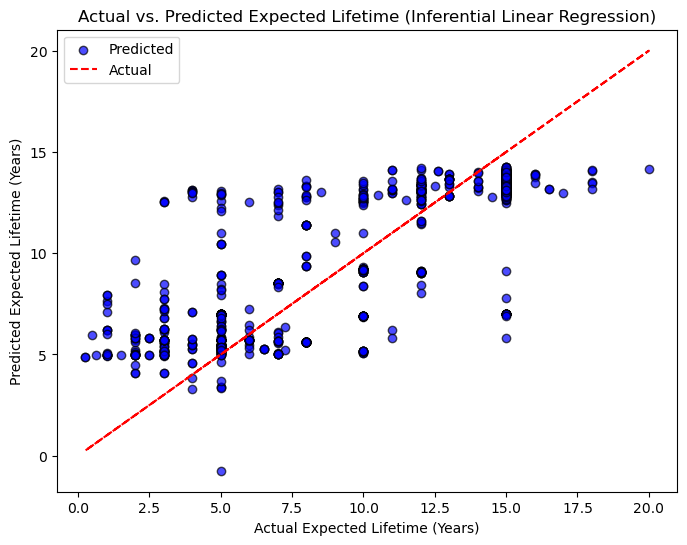

In [205]:
plt.figure(figsize=(8, 6))
plt.scatter(y, model.fittedvalues, alpha=0.7, color='blue', edgecolors='k', label='Predicted')
plt.plot(y, y, color='red', linestyle='dashed', label='Actual')
plt.xlabel("Actual Expected Lifetime (Years)")
plt.ylabel("Predicted Expected Lifetime (Years)")
plt.title("Actual vs. Predicted Expected Lifetime (Inferential Linear Regression)")
plt.legend()
plt.show()

Testing standardscaler on the data to see if it improves the model

In [211]:
from sklearn.preprocessing import StandardScaler
X = orbit[['Perigee (Kilometers)', 'Apogee (Kilometers)', 'Launch Mass (Kilograms)', 'Inclination (Degrees)']]
y = orbit['Expected Lifetime (Years)']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = sm.add_constant(X_scaled)

model = sm.OLS(y, X_scaled).fit()
print(model.summary())



                                OLS Regression Results                               
Dep. Variable:     Expected Lifetime (Years)   R-squared:                       0.604
Model:                                   OLS   Adj. R-squared:                  0.602
Method:                        Least Squares   F-statistic:                     361.3
Date:                       Wed, 02 Aug 2023   Prob (F-statistic):          5.71e-189
Time:                               12:26:26   Log-Likelihood:                -2377.6
No. Observations:                        954   AIC:                             4765.
Df Residuals:                            949   BIC:                             4790.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [212]:

from sklearn.preprocessing import MinMaxScaler



X = orbit[['Perigee (Kilometers)', 'Apogee (Kilometers)', 'Launch Mass (Kilograms)', 'Inclination (Degrees)']]
y = orbit['Expected Lifetime (Years)']

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


X_normalized = sm.add_constant(X_normalized)

model = sm.OLS(y, X_normalized).fit()

print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Expected Lifetime (Years)   R-squared:                       0.604
Model:                                   OLS   Adj. R-squared:                  0.602
Method:                        Least Squares   F-statistic:                     361.3
Date:                       Wed, 02 Aug 2023   Prob (F-statistic):          5.71e-189
Time:                               12:27:08   Log-Likelihood:                -2377.6
No. Observations:                        954   AIC:                             4765.
Df Residuals:                            949   BIC:                             4790.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [213]:

from sklearn.model_selection import cross_val_score

X = orbit[['Perigee (Kilometers)', 'Apogee (Kilometers)', 'Launch Mass (Kilograms)', 'Inclination (Degrees)']]
y = orbit['Expected Lifetime (Years)']


standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

model_standard = LinearRegression()
scores_standard = cross_val_score(model_standard, standard_scaler.fit_transform(X), y, cv=5)
print("Cross-validation scores with Standard Scaler:", scores_standard)
print("Average R-squared with Standard Scaler:", scores_standard.mean())

model_minmax = LinearRegression()
scores_minmax = cross_val_score(model_minmax, minmax_scaler.fit_transform(X), y, cv=5)
print("Cross-validation scores with MinMax Scaler:", scores_minmax)
print("Average R-squared with MinMax Scaler:", scores_minmax.mean())

Cross-validation scores with Standard Scaler: [ 0.74610994 -0.20361114  0.63118357  0.46239646  0.47164253]
Average R-squared with Standard Scaler: 0.42154427316663884
Cross-validation scores with MinMax Scaler: [ 0.74610994 -0.20361114  0.63118357  0.46239646  0.47164253]
Average R-squared with MinMax Scaler: 0.421544273166639


The scaling methods were essentially the same. Didn't improve the model.